<h1 align='center'>Banglore House Price Prediction</h1>

Dataset link: https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df1 = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/DataScience/BangloreHomePrices/model/bengaluru_house_prices.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

## Data Cleaning

### The datasets' rows are quite large, let's explore

In [4]:
df1['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [5]:
df1['balcony'].value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

### Drop unnecessary columns

In [6]:
df2 = df1.drop(['area_type','society','availability'],axis=1)
df2.shape

(13320, 6)

In [7]:
null_val = df2.isnull().sum()
null_val

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

### Drop null values if the number below the threshold

In [8]:
def get_deleted_col(series):
    
    thresh = 0.05
    n = df2.shape[0]
    deleted_col = []

    for col, count in null_val.items():
        value = count / n
        if value < thresh:
            deleted_col.append(col)

    return deleted_col

In [9]:
deleted = get_deleted_col(null_val)
deleted

['location', 'size', 'total_sqft', 'bath', 'balcony', 'price']

In [10]:
df3 = df2.dropna(subset=deleted)

In [11]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [12]:
df3.shape

(12710, 6)

In [13]:
df3

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


## Feature Engineering

### Create bhk column to collect numbers from size column

bhk: Bedroom, Hall, Kitchen

In [14]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [15]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\0815\AppData\Local\Temp\ipykernel_18412\2222900254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [16]:
df4 = df3.drop('size',axis=1)

In [17]:
df4

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...
13314,Green Glen Layout,1715,3.0,3.0,112.00,3
13315,Whitefield,3453,4.0,0.0,231.00,5
13317,Raja Rajeshwari Nagar,1141,2.0,1.0,60.00,2
13318,Padmanabhanagar,4689,4.0,1.0,488.00,4


### Explore total_sqft column

In [18]:
df4['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

#### Check non-float values

In [19]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [20]:
df4[~df4['total_sqft'].apply(is_float)]

,location,total_sqft,bath,balcony,price,bhk
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,1015 - 1540,2.0,0.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.0,0.0,38.190,2
12990,Talaghattapura,1804 - 2273,3.0,0.0,122.000,3
13059,Harlur,1200 - 1470,2.0,0.0,72.760,2
13265,Hoodi,1133 - 1384,2.0,0.0,59.135,2


In [21]:
df4[~df4['total_sqft'].apply(is_float)]['total_sqft'].unique()

array(['2100 - 2850', '3067 - 8156', '1042 - 1105', '1145 - 1340',
       '1015 - 1540', '34.46Sq. Meter', '1195 - 1440', '1120 - 1145',
       '3090 - 5002', '1160 - 1195', '1000Sq. Meter', '1115 - 1130',
       '520 - 645', '1000 - 1285', '650 - 665', '633 - 666', '5.31Acres',
       '30Acres', '1445 - 1455', '884 - 1116', '850 - 1093',
       '716Sq. Meter', '547.34 - 827.31', '580 - 650', '3425 - 3435',
       '1804 - 2273', '3630 - 3800', '4000 - 5249', '1500Sq. Meter',
       '142.61Sq. Meter', '1574Sq. Yards', '1250 - 1305', '670 - 980',
       '1005.03 - 1252.49', '1004 - 1204', '645 - 936', '2710 - 3360',
       '2830 - 2882', '596 - 804', '1255 - 1863', '1300 - 1405',
       '117Sq. Yards', '934 - 1437', '980 - 1030', '2249.81 - 4112.19',
       '1070 - 1315', '3040Sq. Meter', '500Sq. Yards', '2806 - 3019',
       '613 - 648', '704 - 730', '1210 - 1477', '3369 - 3464',
       '1125 - 1500', '167Sq. Meter', '1076 - 1199', '381 - 535',
       '524 - 894', '540 - 670', '2725 - 3

In [22]:
df4[df4['total_sqft']=='300Sq. Yards']

,location,total_sqft,bath,balcony,price,bhk
12652,Billamaranahalli,300Sq. Yards,2.0,2.0,150.0,2


#### Create the func to convert the column

In [23]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [24]:
df5 = df4.copy()
df5['total_sqft'] = df5['total_sqft'].apply(convert_sqft_to_num)

#### Check the data

In [25]:
df5.loc[[30]]

,location,total_sqft,bath,balcony,price,bhk
30,Yelahanka,2475.0,4.0,0.0,186.0,4


In [26]:
df5[df5['total_sqft']=='300Sq. Yards']

,location,total_sqft,bath,balcony,price,bhk


In [27]:
df5['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [28]:
df5

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,3.0,112.00,3
13315,Whitefield,3453.0,4.0,0.0,231.00,5
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4


### Explore location column

#### Trim location column 

In [29]:
df5['location'] = df5['location'].apply(lambda x: x.strip())

In [30]:
df5['location'].value_counts()

Whitefield          515
Sarjapur  Road      372
Electronic City     302
Kanakpura Road      261
Thanisandra         234
                   ... 
Shirdi Sai Nagar      1
S R Layout            1
Meenakshi Layout      1
Vidyapeeta            1
Abshot Layout         1
Name: location, Length: 1254, dtype: int64

In [31]:
loc_stats = df5['location'].value_counts()

In [32]:
loc_stats.values.sum()

12710

In [33]:
loc_stats[loc_stats.values>10]

Whitefield              515
Sarjapur  Road          372
Electronic City         302
Kanakpura Road          261
Thanisandra             234
                       ... 
Marsur                   11
Pattandur Agrahara       11
LB Shastri Nagar         11
Vishveshwarya Layout     11
Doddaballapur            11
Name: location, Length: 237, dtype: int64

In [34]:
len(loc_stats[loc_stats.values>10])

237

In [35]:
loc_stats[loc_stats<=10]

Kalkere                  10
Kodigehalli              10
Ganga Nagar              10
1st Block Koramangala    10
Gunjur Palya             10
                         ..
Shirdi Sai Nagar          1
S R Layout                1
Meenakshi Layout          1
Vidyapeeta                1
Abshot Layout             1
Name: location, Length: 1017, dtype: int64

#### We would like to use dummies column / one hot encoding for location column. Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. It will help us with having fewer dummy columns 

In [36]:
loc_stats_less_than_10 = loc_stats[loc_stats<=10]
loc_stats_less_than_10

Kalkere                  10
Kodigehalli              10
Ganga Nagar              10
1st Block Koramangala    10
Gunjur Palya             10
                         ..
Shirdi Sai Nagar          1
S R Layout                1
Meenakshi Layout          1
Vidyapeeta                1
Abshot Layout             1
Name: location, Length: 1017, dtype: int64

In [37]:
len(df5['location'].unique())

1254

In [38]:
df5['location'] = df5['location'].apply(lambda x: 'other' if x in loc_stats_less_than_10 else x)
len(df5['location'].unique())

238

## Remove outlier

In [39]:
df5.shape

(12710, 6)

### If the sqft / bedroom should be 300 as minimum value, let's remove those datapoints

In [40]:
df5[~(df5['total_sqft']/df5['bhk']<300)]

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,3.0,112.00,3
13315,Whitefield,3453.0,4.0,0.0,231.00,5
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4


In [41]:
df5a = df5[~(df5['total_sqft']/df5['bhk']<300)]
df5a.shape

(12055, 6)

In [42]:
df6 = df5a.copy()
df6['price_per_sqft'] = df6['price']*100000/df6['total_sqft']

In [43]:
df6

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,3.0,112.00,3,6530.612245
13315,Whitefield,3453.0,4.0,0.0,231.00,5,6689.834926
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4,10407.336319


In [44]:
df6['price_per_sqft'].describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

### Remove outliers per location using mean and two standar deviation

In [45]:
def remove_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf['price_per_sqft'])
        st = np.std(subdf['price_per_sqft'])
        reduced_df = subdf[(subdf['price_per_sqft']>(m-2*st)) & (subdf['price_per_sqft']<=(m+2*st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [46]:
df6.shape

(12055, 7)

In [47]:
df7 = remove_outliers(df6)
df7.shape

(11505, 7)

In [48]:
df7['price_per_sqft'].describe()

count    11505.000000
mean      5825.656964
std       2682.789270
min        267.829813
25%       4166.666667
50%       5181.818182
75%       6613.756614
max      24000.000000
Name: price_per_sqft, dtype: float64

<AxesSubplot:>

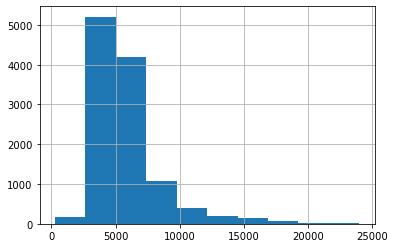

In [49]:
df7['price_per_sqft'].hist()

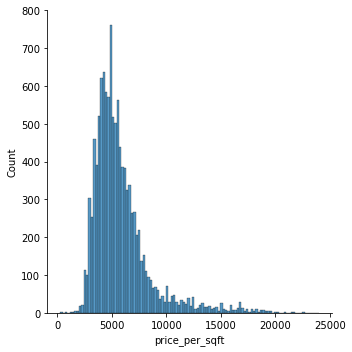

In [50]:
sns.displot(df7['price_per_sqft'])

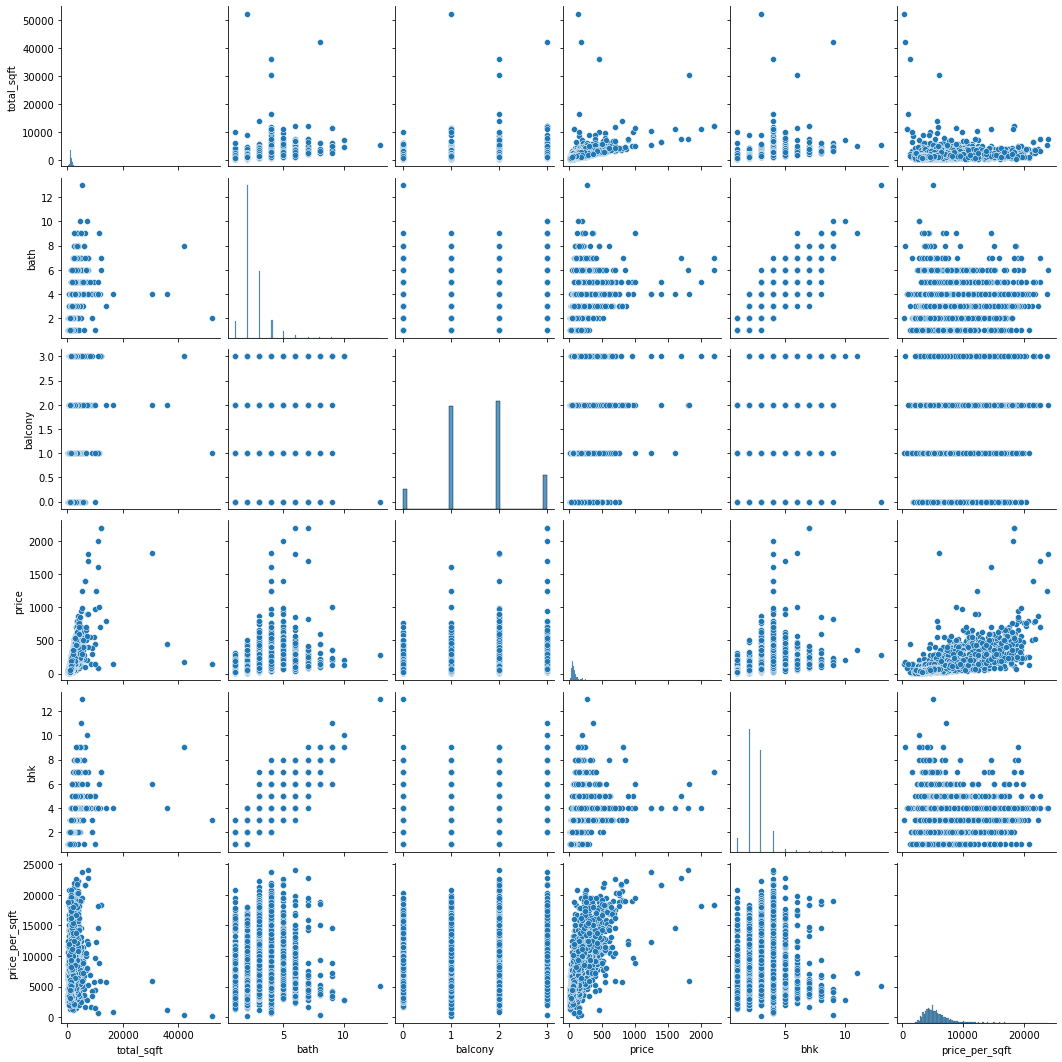

In [51]:
sns.pairplot(df7)

### Check how does the 2 bhk and 3 bhk look like

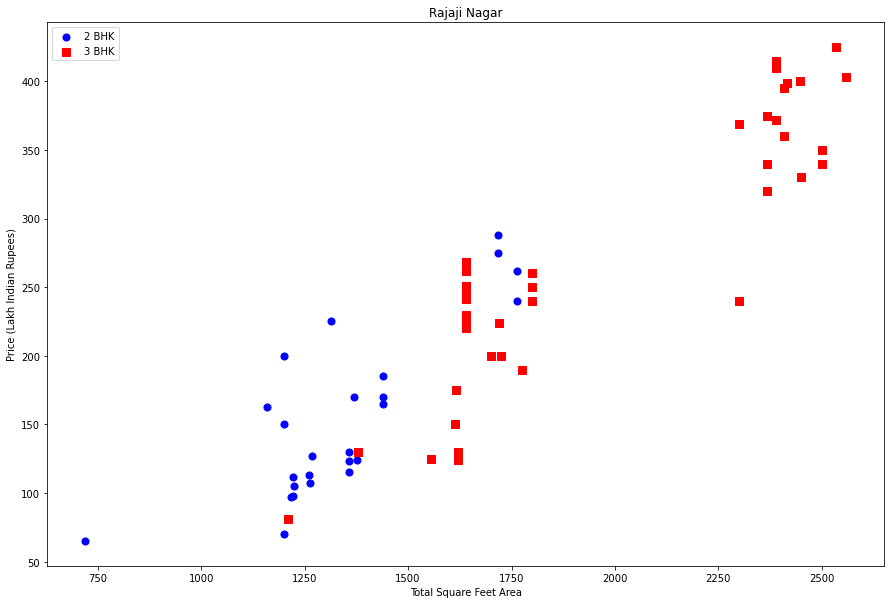

In [52]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.figure(figsize=(15,10))
    plt.scatter(bhk2['total_sqft'],bhk2['price'],color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3['total_sqft'],bhk3['price'],marker='s', color='red',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

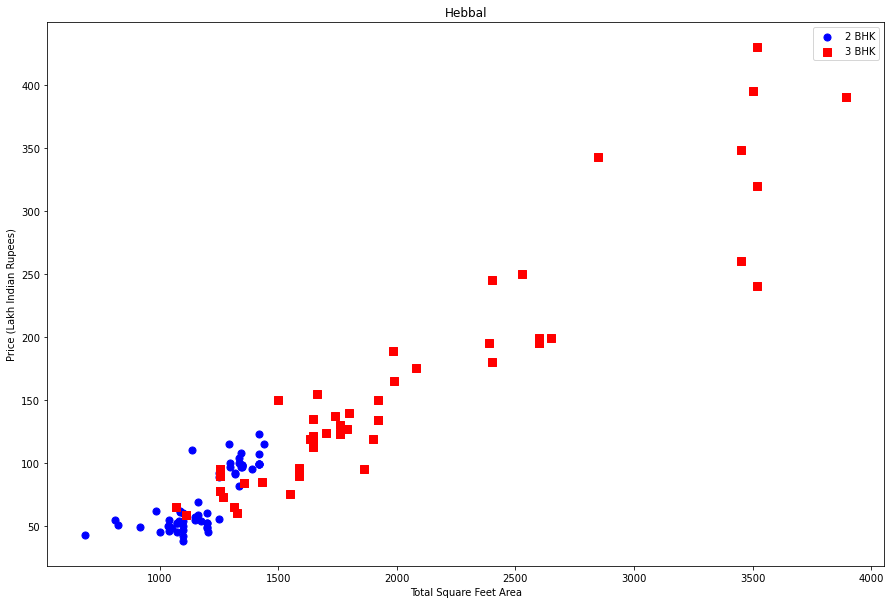

In [53]:
plot_scatter_chart(df7,"Hebbal")

**for each location, we compare if the price of (for example) 3 bhk apartment price_per_sqft is less than the mean of price_per_sqft of 2 bhk apartment, we will drop those values**

In [104]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        
        # collect mean std row_count per bhk for each location
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df['price_per_sqft']),
                'std': np.std(bhk_df['price_per_sqft']),
                'count': bhk_df.shape[0]
            }
            
        # compare price_per_sqft to the mean of bhk-1 
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats_before = bhk_stats.get(bhk-1)
            if stats_before and stats_before['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df['price_per_sqft']<(stats_before['mean'])].index.values)

    return df.drop(exclude_indices,axis='index')

In [105]:
df7.shape

(11505, 7)

In [106]:
df8 = remove_bhk_outliers(df7)
df8.shape

(8133, 7)

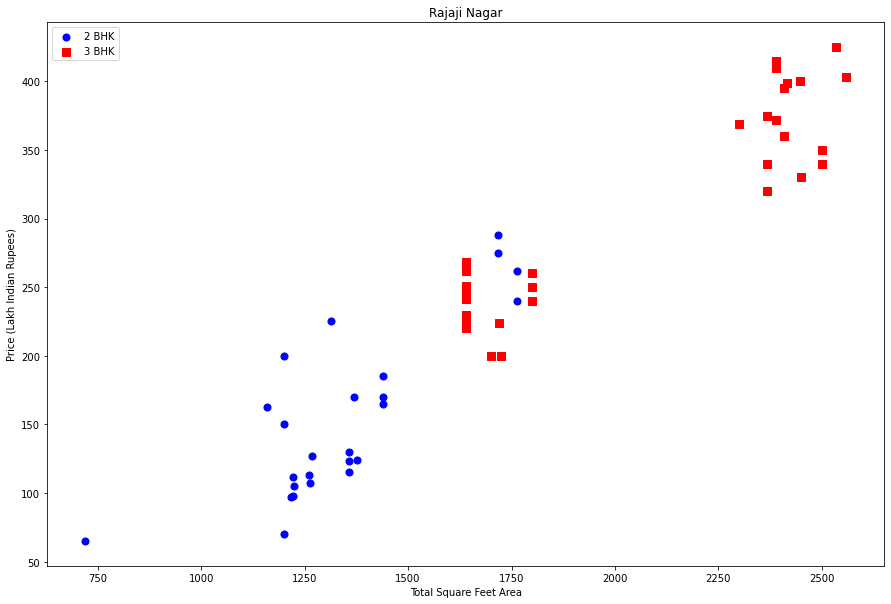

In [76]:
plot_scatter_chart(df8,"Rajaji Nagar")

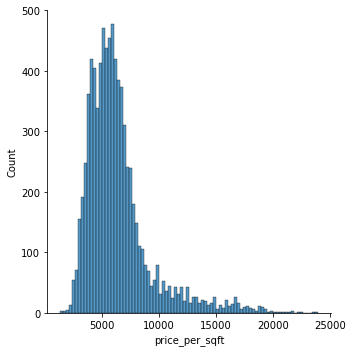

In [111]:
sns.displot(df8['price_per_sqft'])

In [112]:
df8

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,12533.333333
3,1st Block Jayanagar,2400.0,4.0,2.0,450.0,4,18750.000000
4,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,10833.333333
...,...,...,...,...,...,...,...
11496,other,1800.0,1.0,1.0,200.0,1,11111.111111
11497,other,2000.0,2.0,2.0,360.0,3,18000.000000
11498,other,1140.0,1.0,1.0,185.0,2,16228.070175
11501,other,1353.0,2.0,2.0,110.0,2,8130.081301


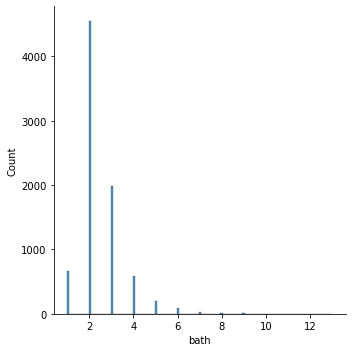

In [113]:
sns.displot(df8['bath'])

### Explore bath column

**It's kinda unusual if you have more bathroom than bhk. Let's decide a threshold, at least you have more than 2 bhk than bathroom**

In [122]:
df8[df8.bath<df8.bhk+2]

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
19,1st Phase JP Nagar,2200.0,7.0,2.0,350.0,5,15909.090909
38,2nd Stage Nagarbhavi,3000.0,8.0,3.0,451.0,6,15033.333333
39,2nd Stage Nagarbhavi,2400.0,8.0,3.0,450.0,6,18750.000000
598,Arekere,2710.0,6.0,2.0,142.0,4,5239.852399
648,BTM 2nd Stage,1260.0,5.0,1.0,185.0,3,14682.539683
...,...,...,...,...,...,...,...
11177,other,6652.0,6.0,1.0,510.0,4,7666.867108
11301,other,600.0,4.0,1.0,70.0,2,11666.666667
11352,other,5656.0,5.0,0.0,499.0,3,8822.489392
11464,other,6652.0,6.0,1.0,660.0,4,9921.828022


In [123]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(8041, 7)

## Build the model

In [124]:
df9

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,12533.333333
3,1st Block Jayanagar,2400.0,4.0,2.0,450.0,4,18750.000000
4,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,10833.333333
...,...,...,...,...,...,...,...
11496,other,1800.0,1.0,1.0,200.0,1,11111.111111
11497,other,2000.0,2.0,2.0,360.0,3,18000.000000
11498,other,1140.0,1.0,1.0,185.0,2,16228.070175
11501,other,1353.0,2.0,2.0,110.0,2,8130.081301


In [125]:
df10 = df9.drop('price_per_sqft',axis=1)

### One hot encoding

In [126]:
dummies = pd.get_dummies(df10['location']).drop('other',axis=1)

In [127]:
df11 = pd.concat([df10,dummies],axis=1).drop('location',axis=1)

In [128]:
df11

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2400.0,4.0,2.0,450.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,0.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11496,1800.0,1.0,1.0,200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11497,2000.0,2.0,2.0,360.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11498,1140.0,1.0,1.0,185.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11501,1353.0,2.0,2.0,110.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
df11.shape

(8041, 242)

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
X = df11.drop('price',axis=1)
y = df11['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [132]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7711026106890327

### Use k cross validation to measure our Linear Regression score

In [133]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.78633516, 0.76746034, 0.79919417, 0.78484018, 0.79815714])

### Find the model with by using GridSearchCV

In [134]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.787197,{}
1,lasso,0.694367,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.713672,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [137]:
def predict_price(location,sqft,bath,balcony,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = balcony
    x[3] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    
    return lr_clf.predict([x])[0]

In [138]:
predict_price('1st Phase JP Nagar',1000, 2, 1, 2)

C:\Users\0815\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


81.4571819139685

In [140]:
predict_price('Indira Nagar',1000, 3, 2, 3)

C:\Users\0815\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


164.9551494648502

## Export the model and columns

In [141]:
import pickle
with open('banglore_house_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [142]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))